In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("/content/IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# To display statistics about data
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
# To basic info about datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
# To display no. of samples on each class
df["species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [8]:
# check for null values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<Axes: >

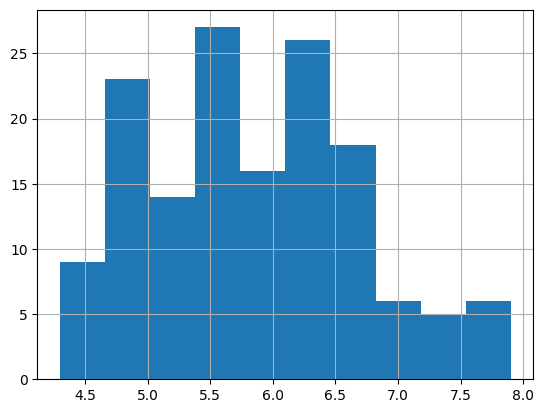

In [10]:
# histogram
df["sepal_length"].hist()

<Axes: >

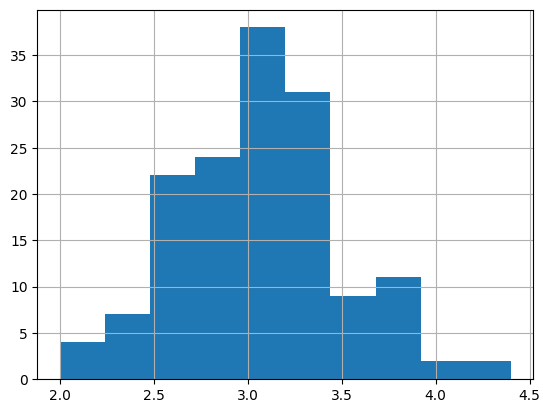

In [13]:
df["sepal_width"].hist()

<Axes: >

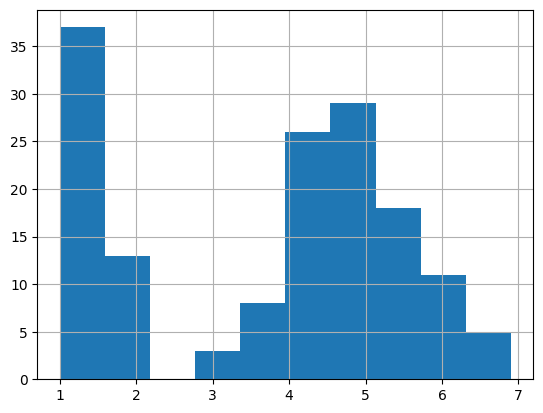

In [11]:
df["petal_length"].hist()

<Axes: >

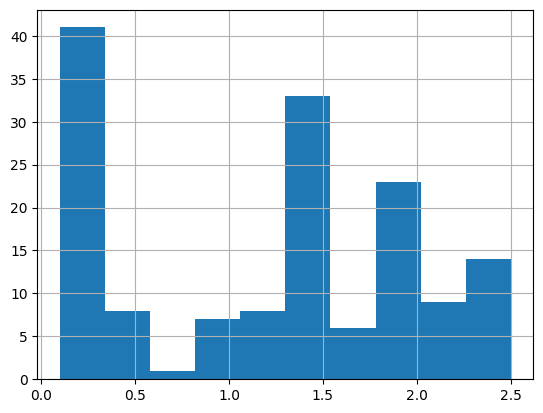

In [12]:
df["petal_width"].hist()

In [46]:
# scatter plot
colors = ["red","orange","blue"]
species = ["Iris-virginica", "Iris-versicolor", "Iris-setosa"]

In [ ]:
for i in range(3):
    x = df[df["species"] == species[i]]
    plt.scatter(x["sepal_length"], x["sepal_width"], c = colors[i], label=species[i])
    plt.xlabel("sepal length")
    plt.ylabel("sepal width")
    plt.legend()

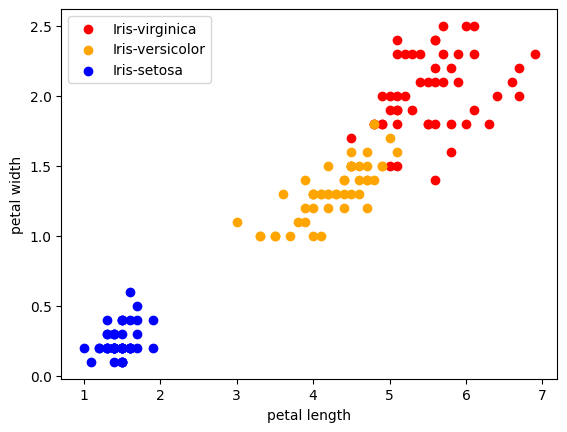

In [17]:
for i in range(3):
    x = df[df["species"] == species[i]]
    plt.scatter(x["petal_length"], x["petal_width"], c = colors[i], label=species[i])
    plt.xlabel("petal length")
    plt.ylabel("petal width")
    plt.legend()

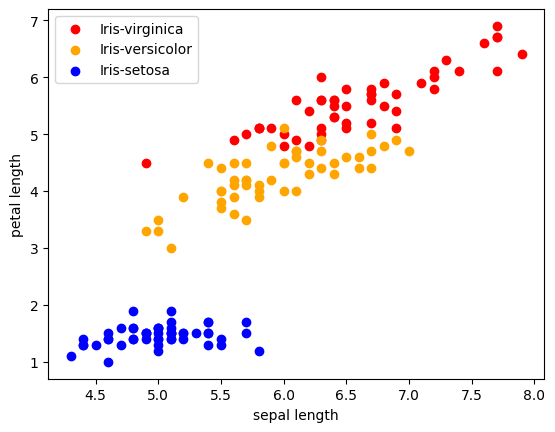

In [20]:
for i in range(3):
    x = df[df["species"] == species[i]]
    plt.scatter(x["sepal_length"], x["petal_length"], c = colors[i], label=species[i])
    plt.xlabel("sepal length")
    plt.ylabel("petal length")
    plt.legend()

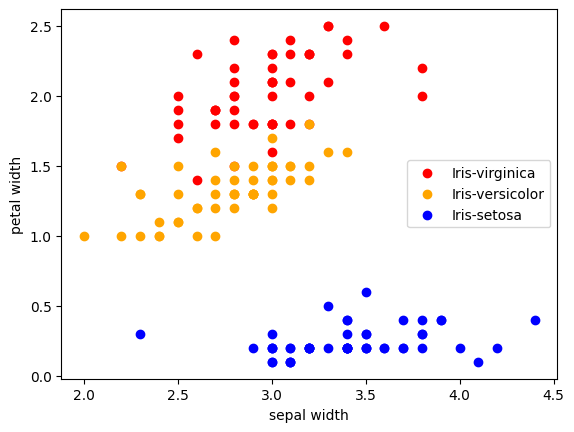

In [22]:
for i in range(3):
    x = df[df["species"] == species[i]]
    plt.scatter(x["sepal_width"], x["petal_width"], c = colors[i], label=species[i])
    plt.xlabel("sepal width")
    plt.ylabel("petal width")
    plt.legend()

In [23]:
df.corr

<bound method DataFrame.corr of      sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]>

<ipython-input-24-36f4bf4ddc00>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

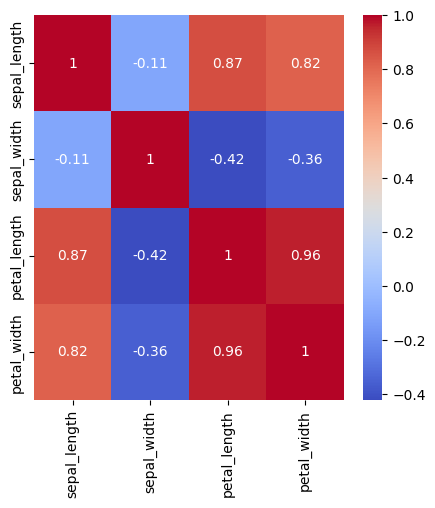

In [24]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [27]:
df['species'] = le.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [29]:
from sklearn.model_selection import train_test_split
# train - 70
# test - 30
X = df.drop(columns=['species'])
Y = df['species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [30]:
# logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [31]:
# model training
model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  93.33333333333333


In [33]:
# knn - k-nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [34]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [35]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  93.33333333333333


In [36]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [37]:
model.fit(x_train, y_train)
DecisionTreeClassifier()

DecisionTreeClassifier()

In [38]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  88.88888888888889
